In [ ]:
import gym
import os
import random
import time
import cv2
import copy
import numpy as np
import collections
import matplotlib.pyplot as plt
import json
import scipy
import argparse
from PIL import Image
from collections import deque
from tqdm import tqdm
import ray
from scipy.signal import savgol_filter

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.multiprocessing as mp
import torchvision as tv
from torch.utils.data import Dataset
import pickle

from src.common.atari_wrappers import wrap_deepmind, make_atari
from src.common.utils import LinearSchedule, DataLoaderX, DataPrefetcher, ReplayDataset
from src.common.vec_env import ShmemVecEnv, VecEnvWrapper, DummyVecEnv
from src.agents.model import NatureCNN

In [69]:
import glob

fs = glob.glob('ckpt/*_e1000*')

In [72]:
len(fs)
datax = {}
for f in fs:
    data = torch.load(f)
    datax[f] = data['TRs']

In [75]:
n = 50
for f in fs:
    d = datax[f][-n:]
    print(f, np.mean(d))


ckpt/Seaquest_e1000.pth 2600.0
ckpt/BeamRider_e1000 1435.36
ckpt/Qbert_e1000.pth 930.0
ckpt/Enduro_e1000.pth 498.62
ckpt/SpaceInvaders_e1000 866.8
ckpt/Breakout_e1000.pth 257.78


In [65]:
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [56]:
data = torch.load('ckpt/Breakout_e1000.pth')
data.keys()

dict_keys(['model', 'optim', 'epoch', 'epsilon', 'steps', 'Rs', 'TRs', 'Qs', 'Ls', 'time'])

In [57]:
x = data['TRs']

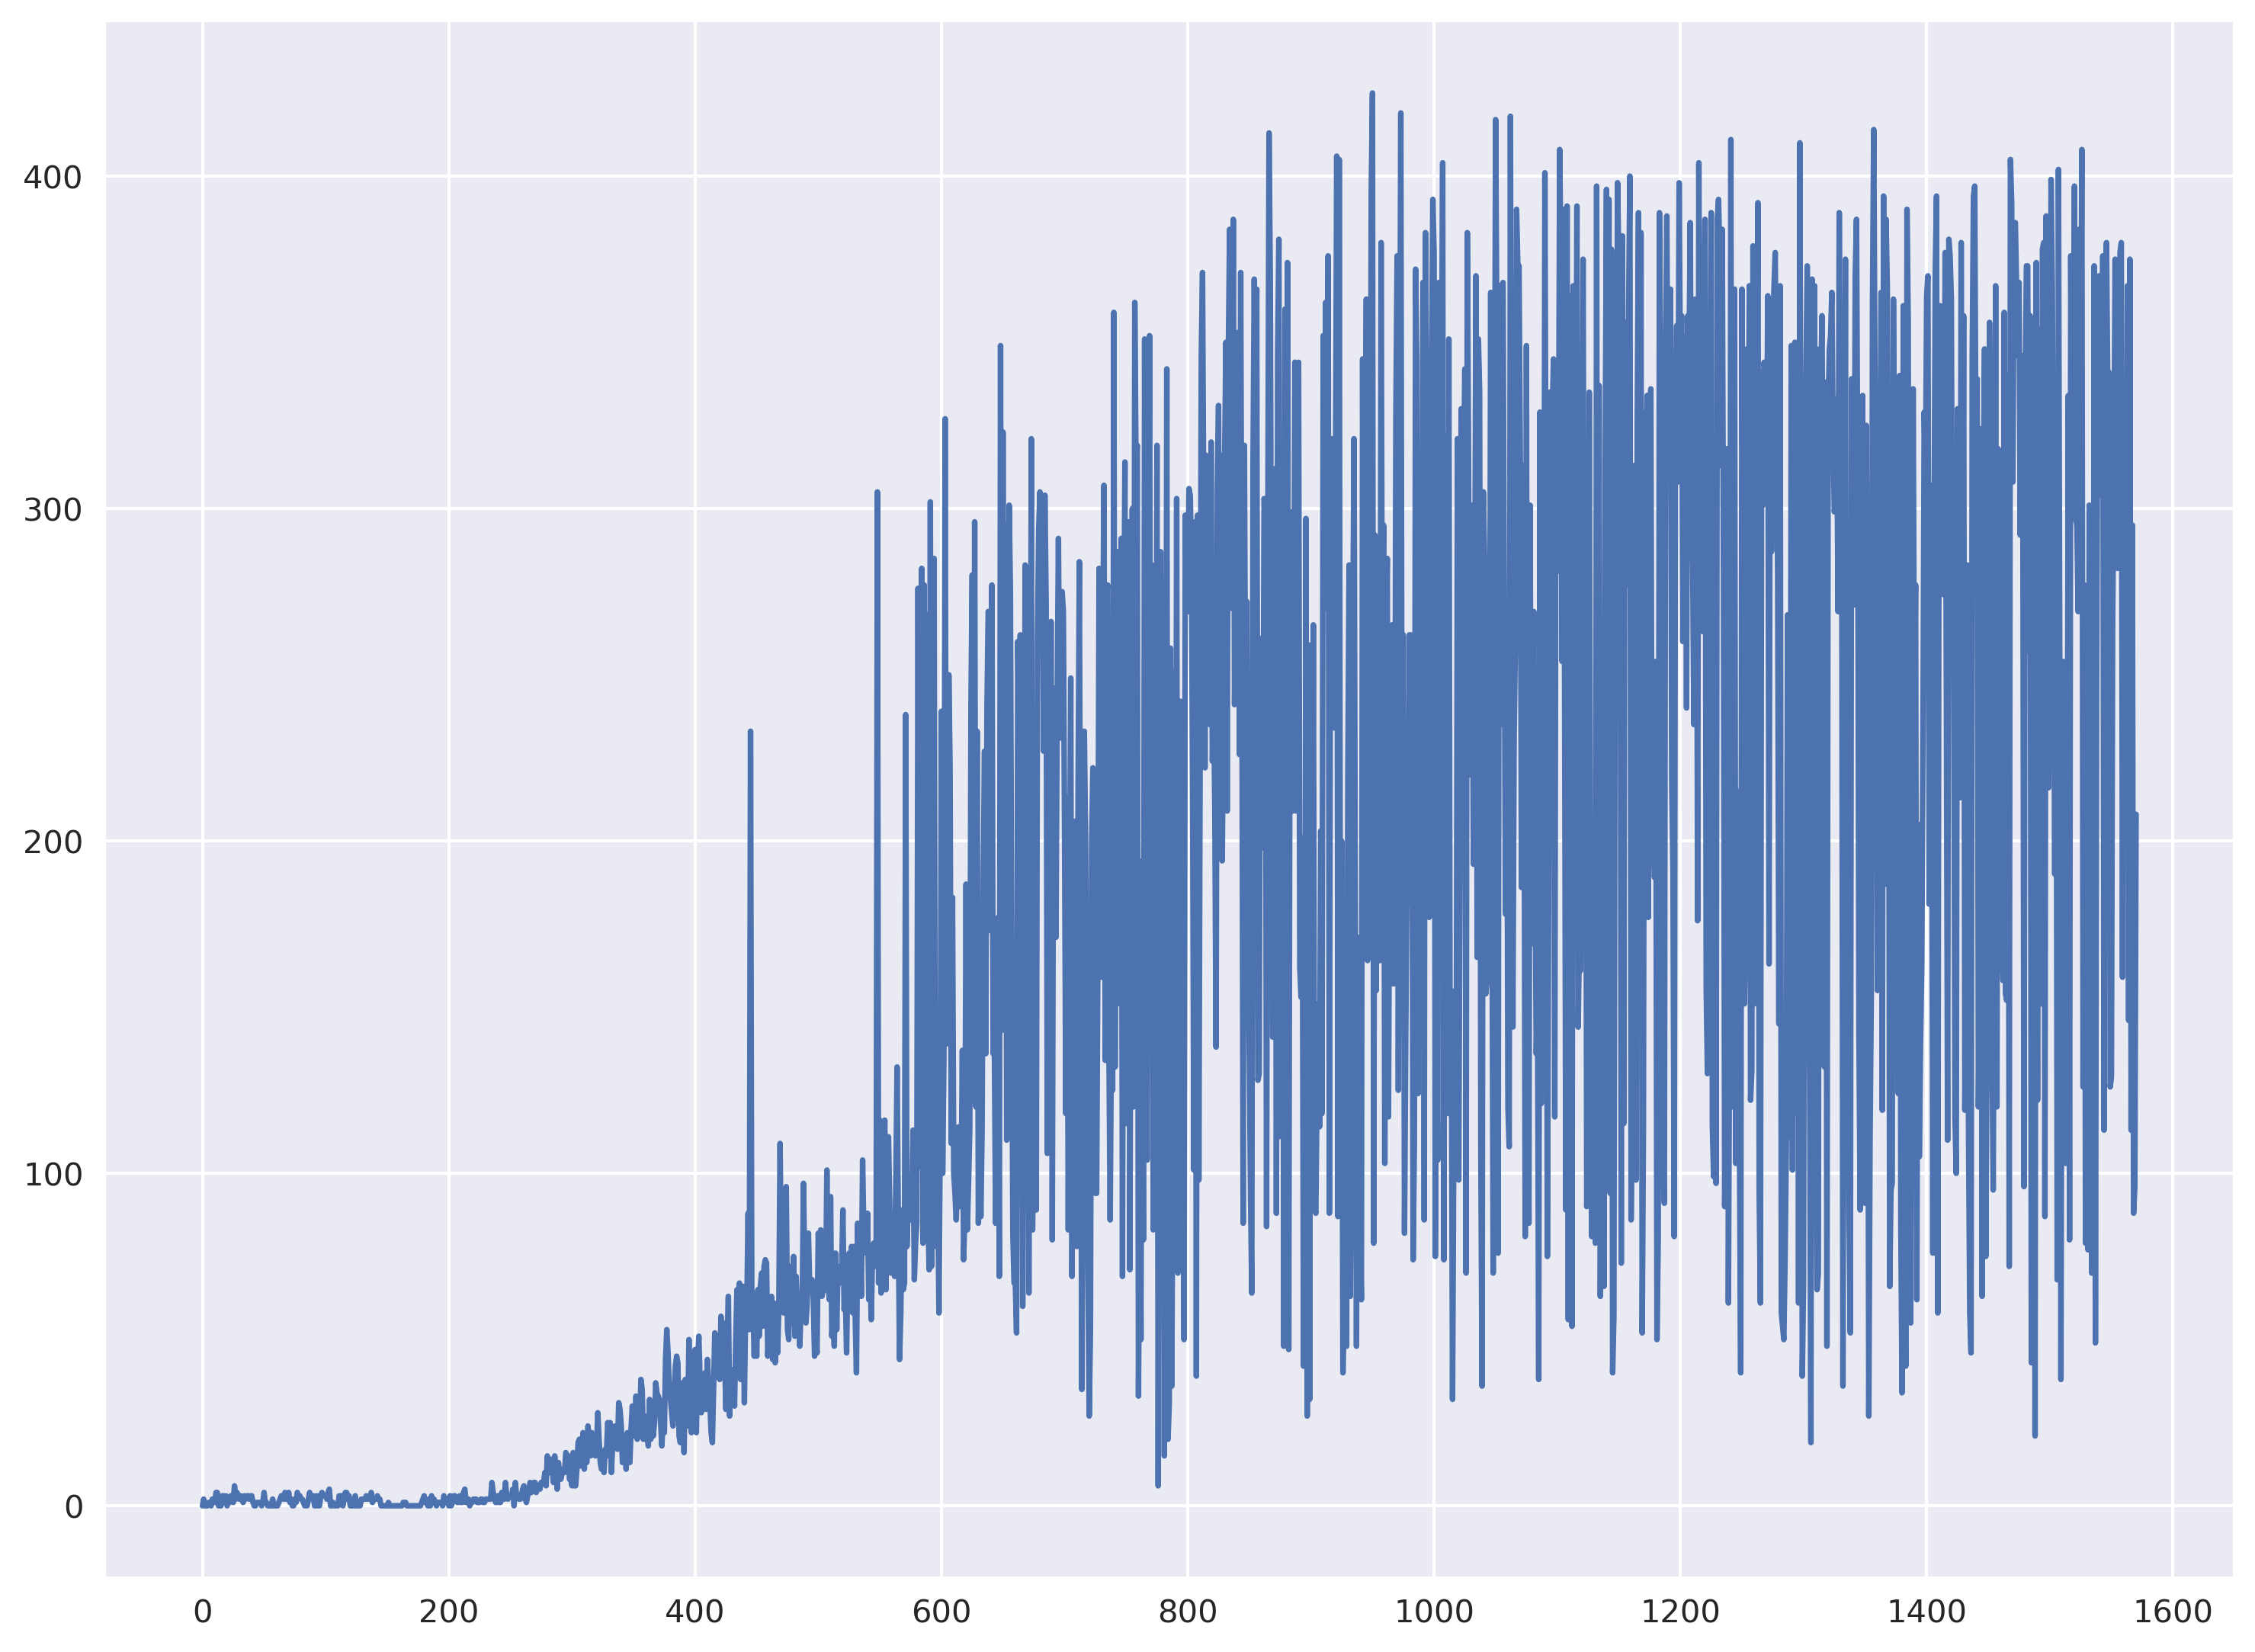

In [58]:
plt.figure(figsize=(12, 9), dpi=300)
plt.plot(x[:])

In [64]:
n = 100
np.mean(x[-n:])

264.94

In [11]:
plt.style.available


['seaborn-ticks',
 'classic',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'ggplot',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-white',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'bmh',
 '_classic_test',
 'seaborn-paper',
 'seaborn',
 'seaborn-bright',
 'fivethirtyeight',
 'Solarize_Light2',
 'seaborn-muted',
 'fast',
 'seaborn-colorblind',
 'tableau-colorblind10',
 'muted',
 'no-latex',
 'high-vis',
 'retro',
 'ieee',
 'vibrant',
 'bright',
 'scatter',
 'pgf',
 'notebook',
 'grid',
 'science']

In [81]:
import os
print(len(fs))
for n in range(0, 1050, 50):
    print(n)
    os.rename(f'ckpt/SpaceInvaders_e{n}', f'ckpt/SpaceInvaders_e{n:04d}.pth')


101
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [83]:
fs = glob.glob('ckpt/Space*')


for f in fs:
    if not '.pth' in f:
        os.remove(f)


In [85]:
data = torch.load('ckpt/Pong_e0100.pth')
data.keys()

dict_keys(['model', 'optim', 'epoch', 'epsilon', 'steps', 'Rs', 'TRs', 'Qs', 'Ls', 'time'])

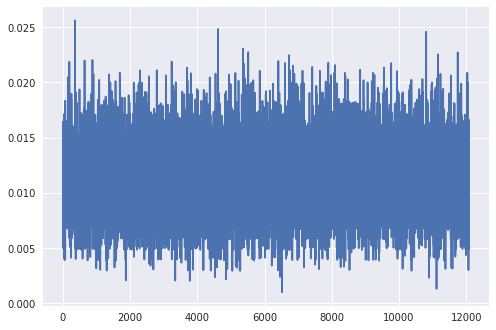

In [90]:
plt.plot(data['Ls'][4000:])

In [93]:
10000 / 8 * 8 / 512

19.53125